### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:
# univariate lstm example
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [86]:
df=pd.read_excel(r"C:\Users\ASUS\Documents\Data.xlsx")

In [87]:
df['Year']=pd.to_datetime(df['Year'])

In [88]:
df.head()

,Year,GDP
0,2000-03-31,291667.301632
1,2001-03-31,296907.504961
2,2002-03-31,321510.243174
3,2003-03-31,352451.546568
4,2004-03-31,400846.585696


In [5]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [6]:
# define input sequence
timeseries_data = df['GDP']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [7]:
print(X),print(y)

[[ 291667.3016319   296907.5049611   321510.24317414]
 [ 296907.5049611   321510.24317414  352451.54656777]
 [ 321510.24317414  352451.54656777  400846.5856956 ]
 [ 352451.54656777  400846.5856956   454626.39652421]
 [ 400846.5856956   454626.39652421  532628.94129803]
 [ 454626.39652421  532628.94129803  639569.21997596]
 [ 532628.94129803  639569.21997596  749340.24499019]
 [ 639569.21997596  749340.24499019  825007.72494696]
 [ 749340.24499019  825007.72494696  936379.59336669]
 [ 825007.72494696  936379.59336669 1148000.58706407]
 [ 936379.59336669 1148000.58706407 1280369.43710241]
 [1148000.58706407 1280369.43710241 1459628.62522419]
 [1280369.43710241 1459628.62522419 1649646.63569529]
 [1459628.62522419 1649646.63569529 1779137.93025266]
 [1649646.63569529 1779137.93025266 1966224.58210802]
 [1779137.93025266 1966224.58210802 2198185.15622487]
 [1966224.58210802 2198185.15622487 2352781.50092102]
 [2198185.15622487 2352781.50092102 2528854.29980529]
 [2352781.50092102 2528854.2

(None, None)

In [8]:
X.shape

(21, 3)

In [9]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [10]:
df.head()

,Year,GDP
0,2000-03-31,291667.301632
1,2001-03-31,296907.504961
2,2002-03-31,321510.243174
3,2003-03-31,352451.546568
4,2004-03-31,400846.585696


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)


# Define model
model= Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mape')

# Fit model with Early Stopping
history = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.3, 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

C:\Users\ASUS\MSc Applied Statistics SPU\ML\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 102.2277 - val_loss: 101.8050 - learning_rate: 0.0010
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 101.8353 - val_loss: 101.4277 - learning_rate: 0.0010
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 101.4533 - val_loss: 101.0539 - learning_rate: 0.0010
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 101.0748 - val_loss: 100.6837 - learning_rate: 0.0010
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 100.6997 - val_loss: 100.3253 - learning_rate: 0.0010
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 100.3345 - val_loss: 99.9681 - learning_rate: 0.0010
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 99.9718 - val_loss: 99.6110 - learning_rate: 0.0010
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 99.6081 - val_loss: 99.2516 - learning_rate: 0.0010
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 99.2447 - val_loss: 98.8944 - learni

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

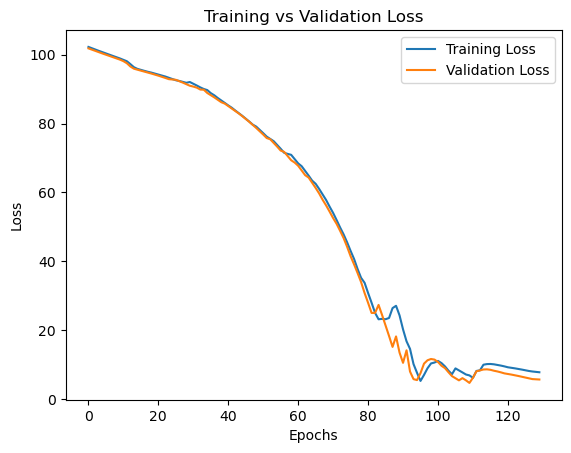

In [15]:
import matplotlib.pyplot as plt
# Assuming 'history' is the output from model.fit()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [16]:

# Get predictions
y_pred = model.predict(X_val)

# Compute Metrics
mape_value = mean_absolute_percentage_error(y_val, y_pred) * 100  # Convert to percentage
mae_value = mean_absolute_error(y_val, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_val, y_pred))

# Print results
print(f"MAPE: {mape_value:.2f}%")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
MAPE: 7.53%
MAE: 99422.51
RMSE: 130525.97


In [ ]:
MAPE: 9.46%
MAE: 137839.44
RMSE: 209752.14

In [17]:
# demonstrate prediction for next 10 days
x_input = np.array(df['GDP'].iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<1):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[3705461.2]
[3705461.2]


In [153]:
data = pd.DataFrame({"Year": ["2024-03-31"], "GDP": [3957839.5]})
data["Year"] = pd.to_datetime(data["Year"])  # Ensure correct date format

# Concatenate the new row to the original dataset
df = pd.concat([df, data], ignore_index=True)

# Display updated dataset
print(df.tail())

         Year           GDP
20 2020-03-31  2.656806e+06
21 2021-03-31  2.610651e+06
22 2022-03-31  3.144138e+06
23 2023-03-31  3.645884e+06
24 2024-03-31  3.957840e+06


In [155]:
df.to_excel(r"C:\Users\ASUS\MSc Applied Statistics SPU\Neural Network\LSTM\model1.xlsx", index=False)

In [151]:
lst_output

[3957839.5]

In [136]:
import matplotlib.pyplot as plt

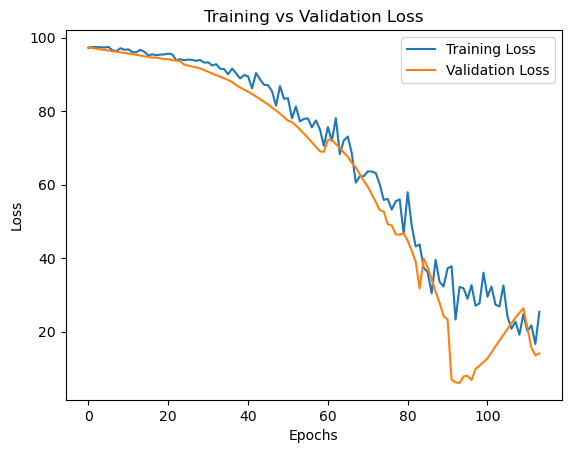

In [137]:
# Assuming 'history' is the output from model.fit()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

### Predicting For the next 5 data

In [90]:
# demonstrate prediction for next 10 days
x_input = np.array(df['GDP'].iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<5):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[3964934.]
1 GDP input [3144138.01684526 3645883.84790797 3964934.        ]
1 GDP output [[4622637.]]
2 GDP input [3645883.84790797 3964934.         4622637.        ]
2 GDP output [[5247553.]]
3 GDP input [3964934. 4622637. 5247553.]
3 GDP output [[5892523.]]
4 GDP input [4622637. 5247553. 5892523.]
4 GDP output [[6758973.]]
[3964934.0, 4622637.0, 5247553.0, 5892523.0, 6758973.0]


In [138]:
len(timeseries_data)

24

In [139]:
lst_output

[3957839.5, 4633635.0, 5271172.0, 5901365.0, 6799357.5]

In [140]:
df['Year']

0    2000-03-31
1    2001-03-31
2    2002-03-31
3    2003-03-31
4    2004-03-31
5    2005-03-31
6    2006-03-31
7    2007-03-31
8    2008-03-31
9    2009-03-31
10   2010-03-31
11   2011-03-31
12   2012-03-31
13   2013-03-31
14   2014-03-31
15   2015-03-31
16   2016-03-31
17   2017-03-31
18   2018-03-31
19   2019-03-31
20   2020-03-31
21   2021-03-31
22   2022-03-31
23   2023-03-31
Name: Year, dtype: datetime64[ns]

### Visualizaing The Output

In [141]:
import matplotlib.pyplot as plt

In [142]:
print("Years shape:", np.shape(df['Year']))  # Should be (24,)
print("timeseries_data shape:", np.shape(timeseries_data))  # Should be (24,)


Years shape: (24,)
timeseries_data shape: (24,)


In [143]:
print("Years shape:", np.shape(GDP_pred_years))  # Should be (24,)
print("timeseries_data shape:", np.shape(lst_output))  # Should be (24,)


Years shape: (5,)
timeseries_data shape: (5,)


In [144]:
Years=df['Year'].max().year
GDP_pred_years=np.arange(Years + 1, Years + 6)

In [145]:
GDP_pred_dates = pd.to_datetime(GDP_pred_years, format='%Y')

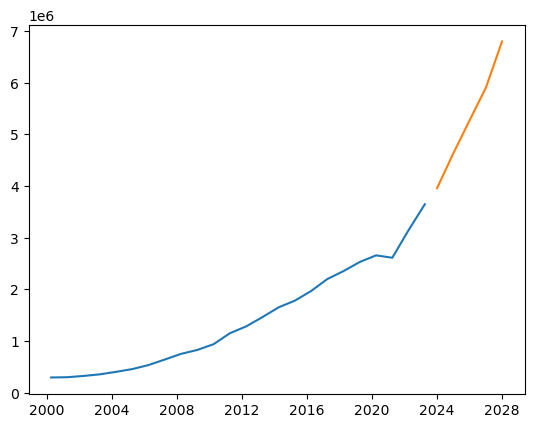

In [146]:

plt.plot(df['Year'],timeseries_data)
plt.plot(GDP_pred_dates,lst_output)


NameError: name 'GDP_pred_dates' is not defined

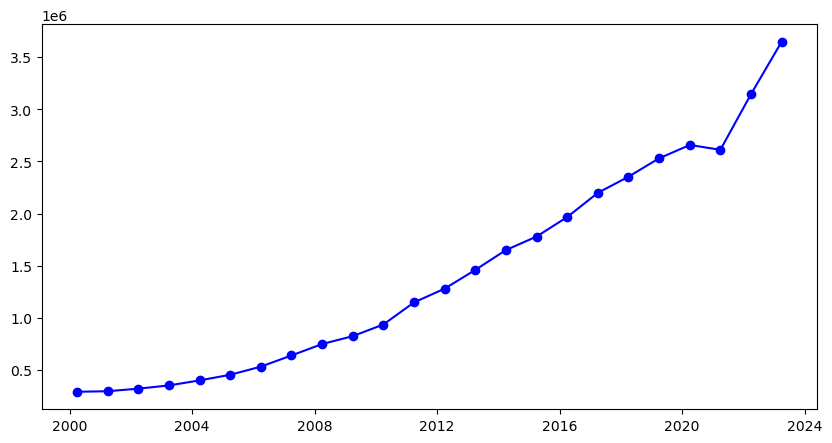

In [18]:
plt.figure(figsize=(10,5))
plt.plot(pd.to_datetime(df['Year'], format='%Y'), timeseries_data, label="Actual GDP", marker='o', color='blue')  
plt.plot(GDP_pred_dates, lst_output, label="Predicted GDP", marker='o', linestyle='dashed', color='red')

plt.xlabel("Year")
plt.ylabel("GSDP")
plt.title("Forecast Maharashtra GSDP")
plt.legend()
plt.grid()
plt.show()


In [148]:
forecasting = pd.DataFrame({'Year': GDP_pred_dates, 'GSDP': lst_output})

In [149]:
forecasting

,Year,GSDP
0,2024-01-01,3957839.5
1,2025-01-01,4633635.0
2,2026-01-01,5271172.0
3,2027-01-01,5901365.0
4,2028-01-01,6799357.5


Fiscal Year	Nominal GSDP (₹ crore)
2022-23	36,41,543
2023-24	40,55,847
2024-25	45,31,518 (projected)

In [32]:
covid_effect=df[df['Year']< "2021-03-31"]

In [33]:
covid_effect.head()

,Year,GDP
0,2000-03-31,291667.301632
1,2001-03-31,296907.504961
2,2002-03-31,321510.243174
3,2003-03-31,352451.546568
4,2004-03-31,400846.585696


In [34]:
# preparing independent and dependent features
def prepare_data(GSDP, n_features):
	X, y =[],[]
	for i in range(len(GSDP)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(GSDP)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = GSDP[i:end_ix], GSDP[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [35]:
# define input sequence
GSDP = covid_effect['GDP']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(GSDP, n_steps)
print(X),print(y)

[[ 291667.3016319   296907.5049611   321510.24317414]
 [ 296907.5049611   321510.24317414  352451.54656777]
 [ 321510.24317414  352451.54656777  400846.5856956 ]
 [ 352451.54656777  400846.5856956   454626.39652421]
 [ 400846.5856956   454626.39652421  532628.94129803]
 [ 454626.39652421  532628.94129803  639569.21997596]
 [ 532628.94129803  639569.21997596  749340.24499019]
 [ 639569.21997596  749340.24499019  825007.72494696]
 [ 749340.24499019  825007.72494696  936379.59336669]
 [ 825007.72494696  936379.59336669 1148000.58706407]
 [ 936379.59336669 1148000.58706407 1280369.43710241]
 [1148000.58706407 1280369.43710241 1459628.62522419]
 [1280369.43710241 1459628.62522419 1649646.63569529]
 [1459628.62522419 1649646.63569529 1779137.93025266]
 [1649646.63569529 1779137.93025266 1966224.58210802]
 [1779137.93025266 1966224.58210802 2198185.15622487]
 [1966224.58210802 2198185.15622487 2352781.50092102]
 [2198185.15622487 2352781.50092102 2528854.29980529]]
[ 352451.54656777  400846.5

(None, None)

In [36]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [37]:
X.shape

(18, 3, 1)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import numpy as np

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [42]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)


# Define model
model1 = Sequential()
model1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model1.add(LSTM(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mape')

# Fit model with Early Stopping
history1 = model1.fit(X_train, y_train, epochs=1000, batch_size=10, validation_split=0.3, 
                    callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 98.6777 - val_loss: 98.6323 - learning_rate: 0.0010
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 98.6038 - val_loss: 98.4952 - learning_rate: 0.0010
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 98.4644 - val_loss: 98.3981 - learning_rate: 0.0010
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 98.3511 - val_loss: 98.2963 - learning_rate: 0.0010
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 98.2464 - val_loss: 98.1902 - learning_rate: 0.0010
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 98.1374 - val_loss: 98.0800 - learning_rate: 0.0010
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 98.0241 - val_loss: 97.9656 - learning_rate: 0.0010
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 97.9122 - val_loss: 97.8471 - learning_rate: 0.0010
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 97.7968 - val_loss: 97.7244 - learning_rate: 0.

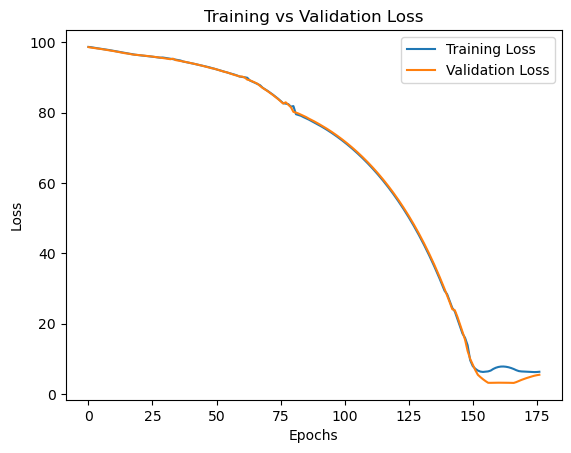

In [43]:
import matplotlib.pyplot as plt
# Assuming 'history' is the output from model.fit()
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [47]:
# Get predictions
y_pred = model1.predict(X_test)

# Compute Metrics
mape_value = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
mae_value = mean_absolute_error(y_test, y_pred)
rmse_value = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"MAPE: {mape_value:.2f}%")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
MAPE: 7.33%
MAE: 56228.28
RMSE: 73421.26


In [ ]:
MAPE: 
7.33%
MAE: 
56228.28
RMSE:
73421.26

In [92]:
# demonstrate prediction for next 5years
x_input = np.array(covid_effect['GDP'].iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<5):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model1.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[3685436.5]
1 GDP input [3113574.8 3368883.8 3685436.5]
1 GDP output [[4159963.2]]
2 GDP input [3368883.8  3685436.5  4159963.25]
2 GDP output [[4548339.5]]
3 GDP input [3685436.5 4159963.2 4548339.5]
3 GDP output [[5026338.]]
4 GDP input [4159963.2 4548339.5 5026338. ]
4 GDP output [[5595371.]]
[3685436.5, 4159963.2, 4548339.5, 5026338.0, 5595371.0]


In [79]:
new_data = pd.DataFrame({
    "Year": pd.to_datetime(["2021-03-31", "2022-03-31"]),
    "GDP": [3113574.8, 3368883.8]
})

covid_effect = pd.concat([covid_effect, new_data], ignore_index=True)

In [78]:
covid_effect = covid_effect.drop(index=22)

In [89]:
df.head()

,Year,GDP
0,2000-03-31,291667.301632
1,2001-03-31,296907.504961
2,2002-03-31,321510.243174
3,2003-03-31,352451.546568
4,2004-03-31,400846.585696


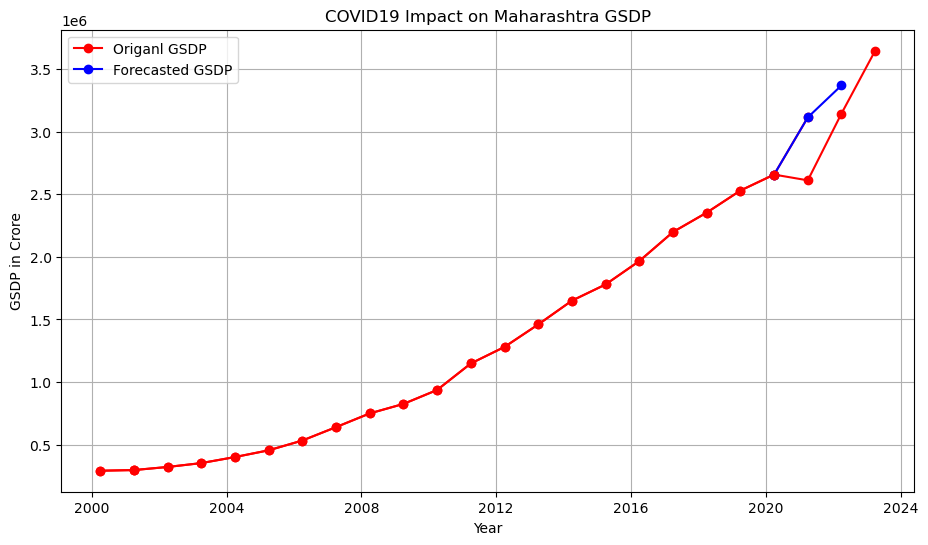

In [93]:
import matplotlib.pyplot as plt

# Sample data (Replace with your actual DataFrame)
years = covid_effect["Year"]
gdp = covid_effect["GDP"]

plt.figure(figsize=(11, 6))

# Plot historical data (before forecasting)
plt.plot(df['Year'], df['GDP'], label='Origanl GSDP', color='red', marker='o')
plt.plot(years[:22], gdp[:22], marker='o', linestyle='-', color='red')

# Plot forecasted data with a different color
plt.plot(years[20:], gdp[20:], marker='o', linestyle='-', color='blue', label="Forecasted GSDP")  

# Highlight specific points
plt.scatter([years[1], years[20]], [gdp[1], gdp[20]], color='red', zorder=3)

# Add labels
plt.xlabel("Year")
plt.ylabel("GSDP in Crore")
plt.title("COVID19 Impact on Maharashtra GSDP")
plt.xticks(rotation=360)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [82]:
covid_effect

,Year,GDP,GSDP
0,2000-03-31,2.916673e+05,NaN
1,2001-03-31,2.969075e+05,NaN
2,2002-03-31,3.215102e+05,NaN
3,2003-03-31,3.524515e+05,NaN
4,2004-03-31,4.008466e+05,NaN
5,2005-03-31,4.546264e+05,NaN
6,2006-03-31,5.326289e+05,NaN
7,2007-03-31,6.395692e+05,NaN
8,2008-03-31,7.493402e+05,NaN
9,2009-03-31,8.250077e+05,NaN


In [68]:
Years=covid_effect['Year'].max().year
covid_GDP_pred_years=np.arange(Years + 1, Years + 3)

In [69]:
covid_GDP_pred_years = pd.to_datetime(covid_GDP_pred_years, format='%Y')

In [70]:
covid_GDP_pred_years

DatetimeIndex(['2021-01-01', '2022-01-01'], dtype='datetime64[ns]', freq=None)

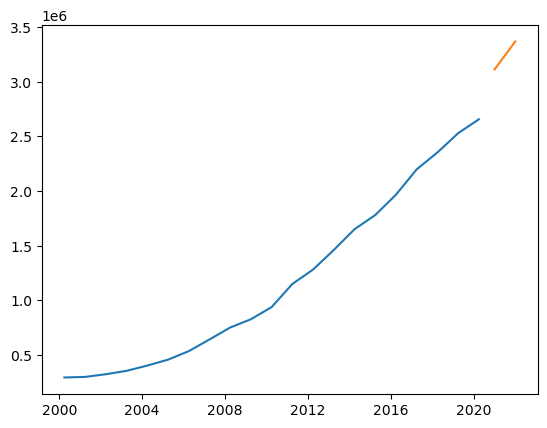

In [71]:
plt.plot(covid_effect['Year'],GSDP)
plt.plot(covid_GDP_pred_years,lst_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
MAPE: 7.90%
MAE: 66628.95
RMSE: 99307.67


In [70]:
100-7.90

MAPE: 7.90%
MAE: 66628.95
RMSE: 99307.67

92.1

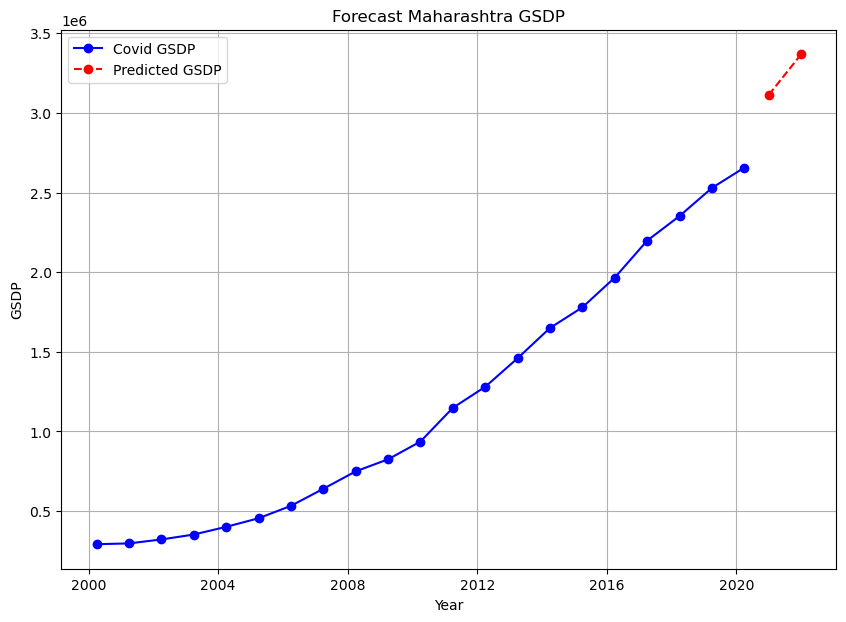

In [72]:
plt.figure(figsize=(10,7))
plt.plot(pd.to_datetime(covid_effect['Year'], format='%Y'), GSDP, label="Covid GSDP", marker='o', color='blue')  
plt.plot(covid_GDP_pred_years, lst_output, label="Predicted GSDP", marker='o', linestyle='dashed', color='red')

plt.xlabel("Year")
plt.ylabel("GSDP")
plt.title("Forecast Maharashtra GSDP")
plt.legend()
plt.grid()
plt.show()


In [ ]:
forecasting = pd.DataFrame({'Year': covid_GDP_pred_years, 'GSDP': lst_output})

In [ ]:
forecasting

In [ ]:
df.tail()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df['GDP'], marker='o', linestyle='-')
plt.title("GSDP Of Maharashtra")
plt.xlabel("Year")
plt.ylabel("GDDP (in Crore)")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 7))

# Convert years to datetime format for proper alignment
df["Year"] = pd.to_datetime(df["Year"], format="%Y")
covid_effect["Year"] = pd.to_datetime(covid_effect["Year"], format="%Y")

# **2️⃣ Plot Predicted Post-COVID GSDP (Red Dashed Line)**
plt.plot(covid_GDP_pred_years, lst_output, label="Predicted GSDP", marker='o', linestyle='dashed', color='red')

# **3️⃣ Plot Actual GSDP of Maharashtra (Green Line)**
plt.plot(df["Year"], df['GDP'], label="Actual GSDP", marker='o', linestyle='-', color='blue')

# **4️⃣ Set Labels & Formatting**
plt.xlabel("Year")
plt.ylabel("GSDP (in Crore)")
plt.title(' COVID-19 Impact on Maharashtra GSDP ')
plt.legend()
plt.grid(True)

# **Show Plot**
plt.show()


In [ ]:
# Get the weights of the first LSTM layer
for layer in model.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}")
    for i, w in enumerate(weights):
        print(f"  Weight {i} - Shape: {w.shape}, Range: ({w.min()}, {w.max()})")


In [ ]:
data=df[df['Year']< "2017-03-31"]

In [ ]:
data.head()

In [ ]:
# preparing independent and dependent features
def prepare_data(CH, n_features):
	X, y =[],[]
	for i in range(len(CH)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(CH)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = CH[i:end_ix], CH[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# define input sequence
CH = data['GDP']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(CH, n_steps)
print(X),print(y)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [ ]:
X.shape[0],X.shape[1],n_features

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping

# Define Early Stopping
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [ ]:

# Define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mape')

# Fit model with Early Stopping
history=model.fit(X, y, epochs=300, verbose=1, validation_split=0.2, callbacks=[early_stopping])

In [ ]:
# demonstrate prediction for next 5years
x_input = np.array(CH.iloc[-3:])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<3):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} GDP input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} GDP output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

In [ ]:
Years=data['Year'].max().year
error_effect=np.arange(Years + 1, Years + 3)

In [ ]:
GSDP_yr = pd.to_datetime(covid_GDP_pred_years, format='%Y')

In [ ]:
forecasting = pd.DataFrame({'Year':GSDP_yr , 'GSDP': lst_output})

In [ ]:
forecasting

In [ ]:
df.tail()

In [55]:
import pandas as pd

# Creating the DataFrame
data = {
    "Year": pd.date_range(start="2000-03-31", periods=24, freq="Y"),
    "GSDP": [
        2.92E+05, 2.97E+05, 3.22E+05, 3.52E+05, 4.01E+05, 4.55E+05, 5.33E+05, 6.40E+05, 
        7.49E+05, 8.25E+05, 9.36E+05, 1.15E+06, 1.28E+06, 1.46E+06, 1.65E+06, 1.78E+06,
        1.97E+06, 2.20E+06, 2.35E+06, 2.53E+06, 2.66E+06, 2.61E+06, 3.14E+06, 3.65E+06
    ]
}

df = pd.DataFrame(data)

# Calculate the Yearly Growth Rate
df["Growth Rate (%)"] = df["GSDP"].pct_change() * 100

# Display the DataFrame
print(df)


         Year       GSDP  Growth Rate (%)
0  2000-12-31   292000.0              NaN
1  2001-12-31   297000.0         1.712329
2  2002-12-31   322000.0         8.417508
3  2003-12-31   352000.0         9.316770
4  2004-12-31   401000.0        13.920455
5  2005-12-31   455000.0        13.466334
6  2006-12-31   533000.0        17.142857
7  2007-12-31   640000.0        20.075047
8  2008-12-31   749000.0        17.031250
9  2009-12-31   825000.0        10.146862
10 2010-12-31   936000.0        13.454545
11 2011-12-31  1150000.0        22.863248
12 2012-12-31  1280000.0        11.304348
13 2013-12-31  1460000.0        14.062500
14 2014-12-31  1650000.0        13.013699
15 2015-12-31  1780000.0         7.878788
16 2016-12-31  1970000.0        10.674157
17 2017-12-31  2200000.0        11.675127
18 2018-12-31  2350000.0         6.818182
19 2019-12-31  2530000.0         7.659574
20 2020-12-31  2660000.0         5.138340
21 2021-12-31  2610000.0        -1.879699
22 2022-12-31  3140000.0        20

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3380\1469815383.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  "Year": pd.date_range(start="2000-03-31", periods=24, freq="Y"),


In [58]:
df.head()

,Year,GSDP,Growth Rate (%)
0,2000-12-31,292000.0,NaN
1,2001-12-31,297000.0,1.712329
2,2002-12-31,322000.0,8.417508
3,2003-12-31,352000.0,9.316770
4,2004-12-31,401000.0,13.920455


In [60]:
data=pd.read_excel(r"C:\Users\ASUS\Documents\constant gdp.xlsx")

In [61]:
data["Growth Rate (%)"] = data["GSDP"].pct_change() * 100

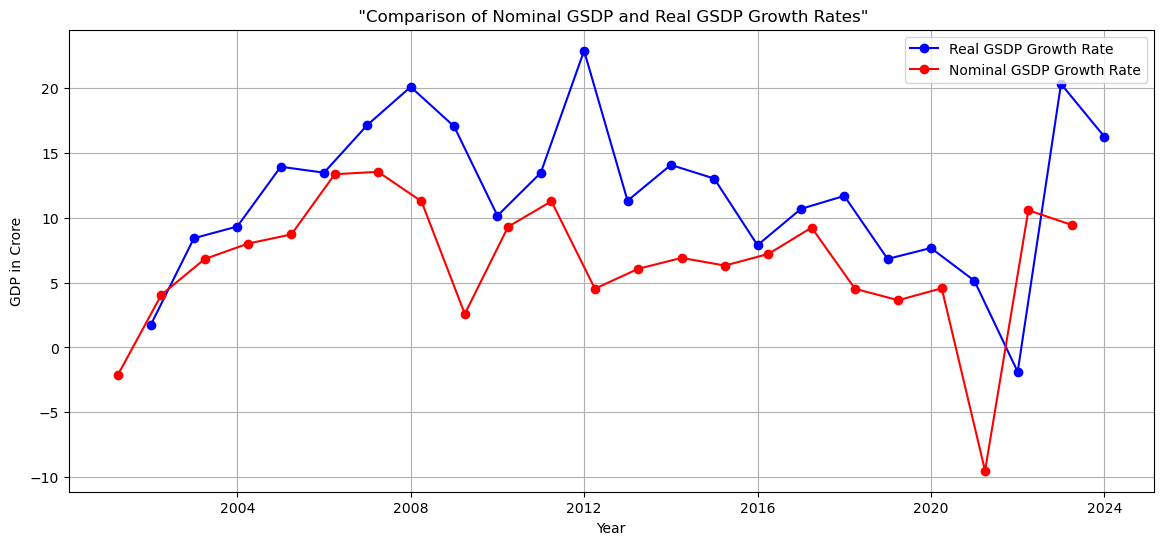

In [64]:

Growth_Rate_real= np.array(df['Growth Rate (%)']) 
Growth_Rate_nominal= np.array(data['Growth Rate (%)']) 

plt.figure(figsize=(14, 6))

# Plot Nominal GDP
plt.plot(df['Year'], Growth_Rate_real, label='Real GSDP Growth Rate', color='blue', marker='o')
plt.plot(data['Years'], Growth_Rate_nominal, label='Nominal GSDP Growth Rate', color='red', marker='o')

plt.title(' "Comparison of Nominal GSDP and Real GSDP Growth Rates"')
plt.xlabel('Year')
plt.ylabel('GDP in Crore')
plt.legend()


plt.grid(True)

plt.show()